# Discount analysis using SQLite and Python
This notebook examines the impact of discounts on order quantity. Data from the Northwind database (created by Microsoft) is used. The Northwind database provides data for a fictional food import/export company. The null hypothesis for is that discounts have no impact on order quantity, ⍺ = 0.05.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import sqlite3    
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#adjust settings
%matplotlib inline
sns.set_theme()

In [2]:
# establish connection to sqlite database
connection = sqlite3.connect("northwind.db")

# create cursor
cursor = connection.cursor()

# execute .sql file in database
filename = '/Users/nicholashernon/downloads/Northwind.Sqlite3.create.sql'
sql_file = open(filename,encoding='latin-1')
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

# query database
cursor.execute("SELECT * FROM [Order Details];")

# create dataframe with query result
order_df = pd.DataFrame(cursor.fetchall())
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]
order_df.columns = field_names
order_df.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


# Examining the data

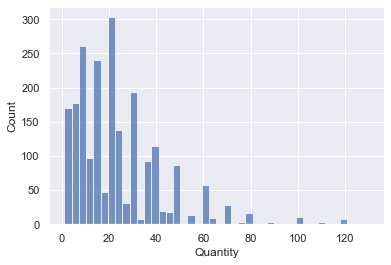

In [3]:
# plot histogram of Quantity variable
sns.histplot(order_df['Quantity'])
plt.show()

The Quantity variable is skewed to the right. A transformation using the natural logarithm of values will provide a more normally distributed series.

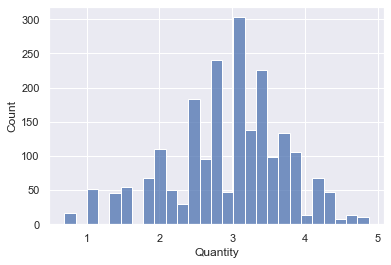

In [4]:
# transform Quantity variable using natural logarithm and re-examine histogram
order_df['Quantity'] = np.log1p(order_df['Quantity'])
sns.histplot(order_df['Quantity'])
plt.show()

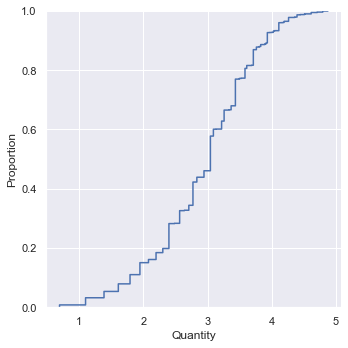

In [5]:
# plot empirical cumulative distribution frequency of dependent varible
sns.displot(order_df['Quantity'],kind='ecdf')
plt.show()

In [6]:
# examine value counts of Discount variable
order_df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Several discount levels were present in fewer than 5 orders. Those orders will be removed from the dataset.

In [7]:
# drop rows with uncommon values for Discount variable 
order_df = order_df.loc[(order_df.Discount != 0.03) & 
                        (order_df.Discount != 0.02) & 
                        (order_df.Discount != 0.01) & 
                        (order_df.Discount != 0.04) &
                        (order_df.Discount != 0.06)]
                   

order_df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [8]:
# create discount and non-discounted order datasets
no_discount_df = order_df[order_df['Discount'] == 0]
quantity_no_dis = no_discount_df['Quantity']

discount_df = order_df[order_df['Discount'] != 0]
quantity_discount = discount_df["Quantity"]

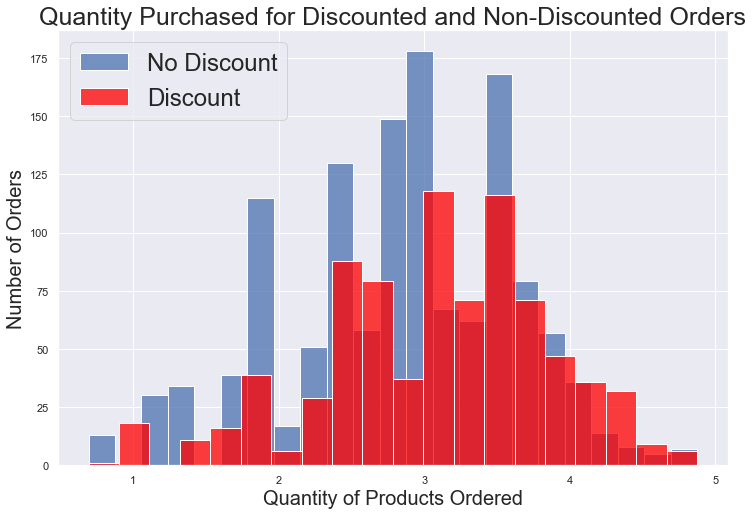

In [9]:
# plot histograms for discount and non-discounted order quantity
plt.figure(figsize=(12,8))
sns.histplot(quantity_no_dis, label='No Discount')
sns.histplot(quantity_discount, label='Discount',color='red')
plt.title('Quantity Purchased for Discounted and Non-Discounted Orders', fontsize=25)
plt.xlabel('Quantity of Products Ordered', fontsize=20)
plt.ylabel('Number of Orders',fontsize=20)
plt.legend(fontsize='24')
plt.show()

In [10]:
# perform a t-test to assess statistical significance of discount on order quantity
t, p = stats.ttest_ind(quantity_discount,quantity_no_dis,equal_var=True)
print(t, p)

6.989657663598585 3.6649732021309006e-12


# Conclusion
Discounts have a statistically significant impact on the quantity of products ordered. 